Emotion detection

In [2]:
!pip install nlp

In [4]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random
import pandas as pd
import seaborn as sns


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()

    
print('Using TensorFlow version', tf.__version__)


Using TensorFlow version 2.16.2


In [6]:
df = pd .read_csv('tweet_emotions.csv')

In [8]:
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [10]:
df.tail()

,tweet_id,sentiment,content
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...
39999,1753919049,love,@mopedronin bullet train from tokyo the gf ...


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


In [14]:
df.columns

Index(['tweet_id', 'sentiment', 'content'], dtype='object')

In [16]:
df.isnull().any()

tweet_id     False
sentiment    False
content      False
dtype: bool

In [18]:
df.isnull().sum()

tweet_id     0
sentiment    0
content      0
dtype: int64

In [20]:
df.describe

<bound method NDFrame.describe of          tweet_id   sentiment  \
0      1956967341       empty   
1      1956967666     sadness   
2      1956967696     sadness   
3      1956967789  enthusiasm   
4      1956968416     neutral   
...           ...         ...   
39995  1753918954     neutral   
39996  1753919001        love   
39997  1753919005        love   
39998  1753919043   happiness   
39999  1753919049        love   

                                                 content  
0      @tiffanylue i know  i was listenin to bad habi...  
1      Layin n bed with a headache  ughhhh...waitin o...  
2                    Funeral ceremony...gloomy friday...  
3                   wants to hang out with friends SOON!  
4      @dannycastillo We want to trade with someone w...  
...                                                  ...  
39995                                   @JohnLloydTaylor  
39996                     Happy Mothers Day  All my love  
39997  Happy Mother's Day to all the m

In [22]:
df['sentiment'].value_counts()

sentiment
neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: count, dtype: int64

In [24]:
df.shape

(40000, 3)

Sentiment Visualization

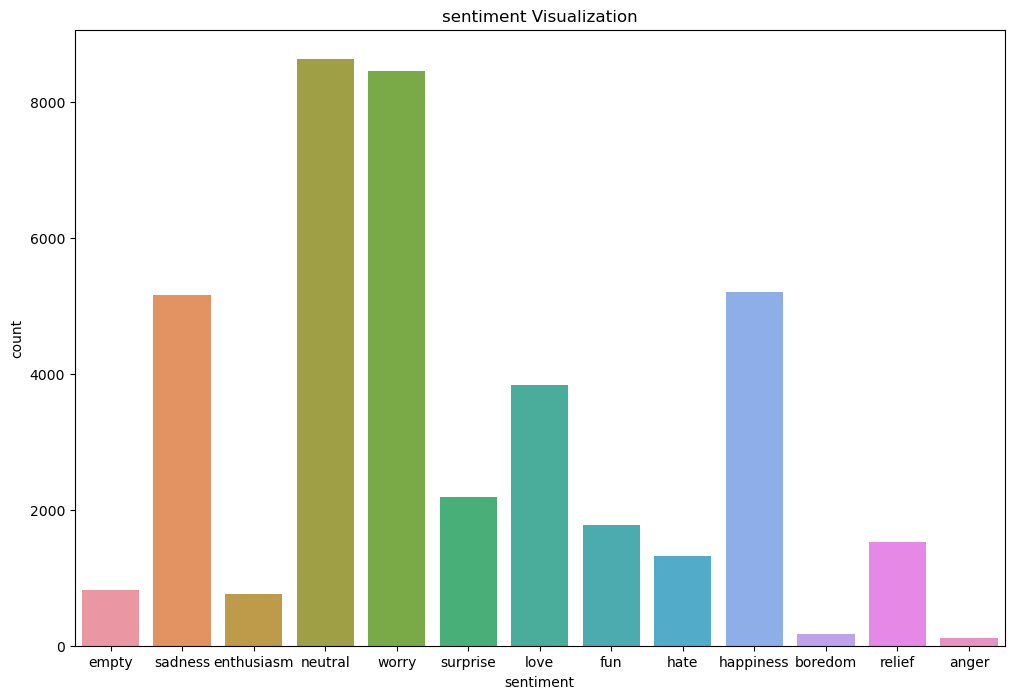

In [27]:
plt.figure(figsize=(12, 8))
sns.countplot(x='sentiment', data=df)
plt.title('sentiment Visualization')
plt.show()

([<matplotlib.patches.Wedge at 0x22e81ff34d0>,
 [Text(0.8564169842831328, 0.6903259730238928, ''),
  Text(-0.4788838243733944, 0.9902879797076768, ''),
  Text(-1.0987910405791117, 0.0515582112090109, ''),
  Text(-0.7913204595637248, -0.7640758668325126, ''),
  Text(-0.10489523038393322, -1.0949872102644405, ''),
  Text(0.4059810557424109, -1.0223401500372944, ''),
  Text(0.6995675319311604, -0.8488847202463625, ''),
  Text(0.8938628961200168, -0.6410999321010229, ''),
  Text(1.0138373165246337, -0.4267714793916408, ''),
  Text(1.0711403031738098, -0.2503167012340945, ''),
  Text(1.0939409301589824, -0.11529631964161115, ''),
  Text(1.0994599276332397, -0.034465454134704164, ''),
  Text(1.099958949120217, -0.009503170541856398, '')])

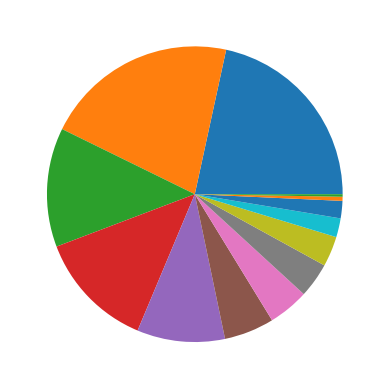

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd .read_csv('tweet_emotions.csv')
plt.pie(df['sentiment'].value_counts())

Text Normalization

In [34]:
!pip install wordcloud

In [36]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize

In [38]:
!pip install toktok

In [40]:
!pip install spacy

In [42]:
!pip install textblob

In [44]:
!pip install nltk

In [46]:
import spacy
import re
import string
import unicodedata
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
from bs4 import BeautifulSoup

In [48]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhig\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
import nltk
from nltk.corpus.reader.tagged import ToktokTokenizer
tokenizers = ToktokTokenizer()
stopwords = nltk.corpus.stopwords.words('english')


In [52]:
!pip install beautifulsoup4


In [54]:
from bs4 import BeautifulSoup


In [56]:
from bs4 import BeautifulSoup
def noiseremoval_content(content):
  soup = BeautifulSoup(content, "html.parser")
  content = soup.get_content()
  content = re.sub('\[[^]]*\]', '',content)
  return content

In [58]:
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


Stemming

In [61]:
def stemmer(content):
  ps = nltk.porter.PorterStemmer()
  content = '.'.join([ps.stem(word) for word in content.split()])
  return content

In [63]:
df['content'] = df['content'].apply(stemmer)

In [65]:
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylu.i.know.i.wa.listenin.to.bad.habit.e...
1,1956967666,sadness,layin.n.bed.with.a.headach.ughhhh...waitin.on....
2,1956967696,sadness,funer.ceremony...gloomi.friday...
3,1956967789,enthusiasm,want.to.hang.out.with.friend.soon!
4,1956968416,neutral,@dannycastillo.we.want.to.trade.with.someon.wh...


In [67]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import ToktokTokenizer


# Download the necessary data
nltk.download('punkt')
nltk.download('stopwords')

# Function to remove stopwords from content
def remove_stopwords(content, stop_words=None, is_lower_case=False):
    # Create a ToktokTokenizer instance
    tokenizers = ToktokTokenizer()

    # Use a regular expression to split the content into words while preserving consecutive full-stop signs

    words = re.findall(r'\w+|\.\.+', content)

    # Remove stopwords
    if stop_words is None:
        stop_words = set()
    else:
        stop_words = set(stop_words)

    if is_lower_case:
        # Remove stopwords without converting tokens to lowercase
        filtokens = [i for i in words if i not in stop_words]
    else:
         # Remove stopwords after converting tokens to lowercase
        filtokens = [i for i in words if i.lower() not in stop_words]

    # Join the filtered words back into a sentence
    filtered_content = ' '.join(filtokens)
    return filtered_content


stop_wr = set(stopwords.words('english'))

df['content'] = df['content'].apply(remove_stopwords, stop_words=stop_wr)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abhig\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhig\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [69]:
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,tiffanylu know wa listenin bad habit earlier s...
1,1956967666,sadness,layin n bed headach ughhhh ... waitin call ...
2,1956967696,sadness,funer ceremony ... gloomi friday ...
3,1956967789,enthusiasm,want hang friend soon
4,1956968416,neutral,dannycastillo want trade someon ha houston tic...


Training Test Split

In [72]:
import pandas as pd

In [74]:
df = pd .read_csv('tweet_emotions.csv')

In [78]:
X = df.content[:6265]

In [80]:
y = df.content[6265:]

Bag of words

In [83]:
from sklearn.feature_extraction.text import CountVectorizer

In [85]:
cv = CountVectorizer(min_df=0.0,max_df=1.0,binary=False,ngram_range=(1,3))
cv_train = cv.fit_transform(X)
cv_test = cv.fit_transform(y)
print('Bow_cv_train',cv_train.shape)
print('Bow_cv_test',cv_test.shape)


Bow_cv_train (6265, 123020)
Bow_cv_test (33735, 539948)


TF_IDF

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [90]:
tf = TfidfVectorizer(min_df=0.0,max_df=1.0,binary=False,ngram_range=(1,3))
tf_train = tf.fit_transform(X)
tf_test = tf.fit_transform(y)
print('Bow_tf_train',tf_train.shape)
print('Bow_tf_test',tf_test.shape)

Bow_tf_train (6265, 123020)
Bow_tf_test (33735, 539948)


Label Encoding

In [93]:
from sklearn.preprocessing import LabelBinarizer


In [95]:
# Create a LabelBinarizer instance
label_binarizer = LabelBinarizer()

# Fit and transform the 'sentiment' column
sentiment_encoded = label_binarizer.fit_transform(df['sentiment'])
print(sentiment_encoded.shape)

(40000, 13)


In [97]:
sentiment_encoded

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [9]:
from sklearn.linear_model import LogisticRegression

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
import pandas as pd
df = pd .read_csv('tweet_emotions.csv')

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
# Create a CountVectorizer instance
vectorizer = CountVectorizer()

# Convert the text data to bag-of-words features
X_bow = vectorizer.fit_transform(df['content'])

# Split the data into features (X) and target (y)
X_train, X_test, y_train, y_test = train_test_split(X_bow, df['sentiment'], test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logistic = LogisticRegression(penalty='l2', max_iter=500, C=1, random_state=42)

# Fitting the model on the training data
lr_bow = logistic.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr_bow.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.33675
Classification Report:


C:\Users\abhig\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        19
     boredom       0.00      0.00      0.00        31
       empty       0.00      0.00      0.00       162
  enthusiasm       0.06      0.01      0.01       163
         fun       0.10      0.04      0.06       338
   happiness       0.34      0.34      0.34      1028
        hate       0.35      0.17      0.23       268
        love       0.45      0.39      0.42       762
     neutral       0.35      0.55      0.43      1740
      relief       0.20      0.05      0.09       352
     sadness       0.29      0.27      0.28      1046
    surprise       0.18      0.08      0.11       425
       worry       0.34      0.42      0.37      1666

    accuracy                           0.34      8000
   macro avg       0.21      0.18      0.18      8000
weighted avg       0.31      0.34      0.31      8000



C:\Users\abhig\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abhig\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Result

In [18]:
# Make predictions on new content data
new_content = ["Im not crying, it's just been raining... on my face."]
new_content_bow = vectorizer.transform(new_content)
y_pred = lr_bow.predict(new_content_bow)

print("Predicted Sentiment:", y_pred[0])

Predicted Sentiment: sadness
